# Bài tập 4

Nguyễn Ngọc Minh Khánh - 1712525


In [1]:
import numpy as np

## Câu 1 (1 điểm)

- Theo đề bài ta có $N > d_{VC}$ thì $m_\mathcal{H}(N) \approx N^{d_{VC}}$
- $\delta = 0.05$,  $\epsilon = 0.05$
 => giải phương trình: $\epsilon = \sqrt{\frac{8}{N} ln \frac{4m_\mathcal{H}(2N)}{\delta} } $, tìm được N $\approx$ 453000

YOUR ANSWER HERE
- Do đó em chọn câu [d]

## Câu 2 (1 điểm)

Theo đề bài ta có N = 10000,  $\delta = 0.05, d_{VC} = 50

- Câu a) $ \epsilon \approx 0.63217 $

- Câu b) $ \epsilon \approx 0.33130 $

- Câu c) $ \epsilon \approx 0.2237 $

- Câu d) $ \epsilon \approx 0.21523 $

In [2]:
N = 10000
delta = 0.05
d_vc = 50

In [3]:
e_a = np.sqrt(8/N * np.log(4*(2*N)**d_vc / delta))
e_b = np.sqrt(2*np.log(2.0*N*(N**d_vc))/N) + np.sqrt(2/N * np.log(1/delta)) + 1/N
print("e_a = {:.5f}".format(e_a))
print("e_b = {:.5f}".format(e_b))
print("Sau quá trình giải bằng máy casio ta có, e_c = {:.5f} ".format(0.2237))
print("Sau quá trình giải bằng máy casio ta có, e_d = {:.5f} ".format(0.21523))

e_a = 0.63217
e_b = 0.33131
Sau quá trình giải bằng máy casio ta có, e_c = 0.22370 
Sau quá trình giải bằng máy casio ta có, e_d = 0.21523 


YOUR ANSWER HERE
- Do đó em chọn câu [d]

## Câu 3 (1 điểm)

Theo đề bài ta có N = 10000,  $\delta = 0.05, d_{VC} = 50

- Câu a) $ \epsilon \approx 0.63217 $
- Câu b) $ \epsilon \approx 0.33130 $

In [4]:
N = 5
e_a = np.sqrt(8/N * np.log(4*(2*N)**d_vc / delta))
e_b = np.sqrt(2*np.log(2.0*N*(N**d_vc))/N) + np.sqrt(2/N * np.log(1/delta)) + 1/N
print("e_a = {:.5f}".format(e_a))
print("e_b = {:.5f}".format(e_b))
print("Sau quá trình giải bằng máy casio ta có, e_c = {:.5f} ".format(5.10306))
print("Sau quá trình giải bằng máy casio ta có, e_d = {:.5f} ".format(5.59271))


e_a = 13.82816
e_b = 7.04878
Sau quá trình giải bằng máy casio ta có, e_c = 5.10306 
Sau quá trình giải bằng máy casio ta có, e_d = 5.59271 


YOUR ANSWER HERE
- Do đó em chọn câu [c]

## Câu 4 (1 điểm)

In [5]:
def generate_dataset(N):
    X = np.random.uniform(-1, 1, (N, 1))
    Y = np.sin(np.pi * X)
    return X, Y

In [6]:
X, Y = generate_dataset(2)
print(X)
print(Y)

[[-0.42888996]
 [-0.38319969]]
[[-0.9751501 ]
 [-0.93342989]]


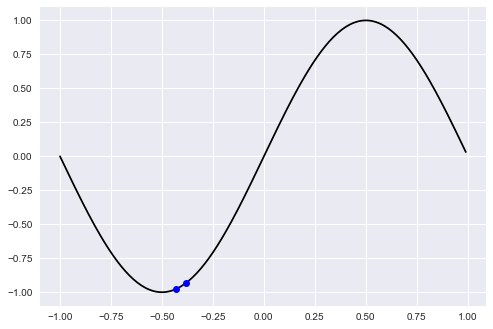

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

xx = np.arange(-1, 1, 0.01).reshape(-1, 1)
yy = np.sin(np.pi*xx)
plt.plot(xx, yy, color = 'black')
plt.plot(X, Y, 'o', color = "blue")

In [8]:
N = 10000
avg = 0.0
for i in range(N):
    X, Y = generate_dataset(2)
    w = np.linalg.pinv(X)@Y
    avg += w/N
print(avg)

[[1.43117958]]


YOUR ANSWER HERE
- Do không có giá trị nào chính xác nên em chọn đáp án [e]

## Câu 5 (1 điểm)

In [9]:
w_gTB = avg # lưu lại trọng số của g trung bình
N = 10000
avg = 0.0
for i in range(N):
    X = np.random.uniform(-1,1)
    g_x = w_gTB*X
    f_x = np.sin(np.pi*X)
    bias = (g_x - f_x)**2
    avg+=bias/N

print(avg)
    

[[0.27345273]]


YOUR ANSWER HERE
- Do đó em chọn đáp án [b]

## Câu 6 (1 điểm)

In [10]:
N = 10000
avg = 0.0
for i in range(N):
    X, Y = generate_dataset(2)
    w_x = np.linalg.inv(X.T@X)@X.T@Y
    X_test = np.random.uniform(-1,1, (1000, 1))
    var = np.mean((w_x*X_test - w_gTB*X_test)**2)
    avg+=var/N
    
print(avg)
    

0.23543288508589322


YOUR ANSWER HERE
- Do đó em chọn câu [a]

## Câu 7 (1 điểm)

In [11]:
def E_out_of_H(h):
    w_g = []
    N = 10000
    N_sample_test = 10000
    if h==1:
        for i in range(N):
            X, Y = generate_dataset(2)
            w = np.linalg.pinv(X)@Y
            w_g.append(w)
            
        w_gTB = np.mean(w_g, axis = 0)
        # Tạo dữ liệu kiểm tra
        X_test = np.random.uniform(-1, 1, (N_sample_test, 1))
        f = np.sin(np.pi*X_test)
        #tính bias
        bias = np.mean((w_gTB - f)**2)
        #tính var
        var = np.mean((w_g - w_gTB)**2) 
        return bias + var
    
    if h==2:
        for i in range(N):
            X, Y = generate_dataset(2)
            w = np.linalg.pinv(X)@Y
            w_g.append(w)
        # Tạo dữ liệu kiểm tra
        X_test = np.random.uniform(-1, 1, (N_sample_test, 1))
        f = np.sin(np.pi*X_test)
            
    if h==3:
        for i in range(N):
            X, Y = generate_dataset(2)
            X = np.hstack((np.ones((2,1)), X))
            w = np.linalg.pinv(X)@Y
            w_g.append(w)
        #Tạo dữ liệu kiểm tra
        X_test = np.random.uniform(-1, 1, (N_sample_test, 1))
        f = np.sin(np.pi*X_test)
        X_test = np.hstack((np.ones((N_sample_test, 1)),X_test))
            
    if h==4:
        for i in range(N):
            X, Y = generate_dataset(2)
            X = X**2
            w = np.linalg.pinv(X)@Y
            w_g.append(w)
        #Tạo dữ liệu kiểm tra
        X_test = np.random.uniform(-1, 1, (N_sample_test, 1))
        f = np.sin(np.pi*X_test)
        X_test = X_test**2
            
    if h==5:
        for i in range(N):
            X, Y = generate_dataset(2)
            X = np.hstack((np.ones((2,1)), X**2))
            w = np.linalg.pinv(X)@Y
            w_g.append(w)
        #Tạo dữ liệu kiểm tra
        X_test = np.random.uniform(-1, 1, (N_sample_test, 1))
        f = np.sin(np.pi*X_test)
        X_test = np.hstack((np.ones((N_sample_test,1)), X_test**2))
        
    w_gTB = np.mean(w_g, axis = 0)
    # Tính bias
    g_avg = X_test @ w_gTB
    bias = np.mean((g_avg-f)**2)
    #Tính var    # Cách tính này đang tính ED[Ex[]]
    var = 0
    for w in w_g:
        g = X_test @ w
        var_g = np.mean((g-g_avg)**2)
        var+=var_g/N
        
    return bias + var

In [12]:
print("Độ lỗi ngoài mẫu của giả thuyết h(x) = b: {:.4f}".format(E_out_of_H(1)))
print("Độ lỗi ngoài mẫu của giả thuyết h(x) = ax: {:.4f}".format(E_out_of_H(2)))
print("Độ lỗi ngoài mẫu của giả thuyết h(x) = ax+b: {:.4f}".format(E_out_of_H(3)))
print("Độ lỗi ngoài mẫu của giả thuyết h(x) = ax^2:{:.4f}".format( E_out_of_H(4)))
print("Độ lỗi ngoài mẫu của giả thuyết h(x) = ax^2+b: {:.4f}".format( E_out_of_H(5)))

Độ lỗi ngoài mẫu của giả thuyết h(x) = b: 3.2136
Độ lỗi ngoài mẫu của giả thuyết h(x) = ax: 0.4955
Độ lỗi ngoài mẫu của giả thuyết h(x) = ax+b: 1.9081
Độ lỗi ngoài mẫu của giả thuyết h(x) = ax^2:14.8013
Độ lỗi ngoài mẫu của giả thuyết h(x) = ax^2+b: 15805.3553


YOUR ANSWER HERE
- Do đó em chọn đáp án [b]

## Câu 8 (1 điểm)

Theo đề bài:
- $m_\mathcal{H}(1)=2$.
- $m_\mathcal{H}(N+1) = 2m_\mathcal{H}(N) - \binom{N}{q}$ với $q$ là một số nguyên cố định $\ge1$. Để dễ nhìn hơn, ta có thể viết lại công thức này như sau: $m_\mathcal{H}(N) = 2m_\mathcal{H}(N-1) - \binom{N-1}{q}$.

- Cho $N$ tăng dần ( $N = 1, 2, 3, ...)$. Ta rút ra nhận xét $m_\mathcal{H}(N)$ bị break ( sớm nhất ) khi $q = N-1$ hay nói cách khác là $m_\mathcal{H}(N) $ vẫn tạo đủ $ 2^N $ dichotomies khi $q>N-1 \approx q>=N$
- VD: Với $q = 1$ => $m_\mathcal{H}{2} = 3$, bị break do không tạo đủ $2^2$ dichotomies => $d_{VC} = 1 = q$ 

=> $d_{VC}$ phụ thuộc vào q và = q 

YOUR ANSWER HERE
- Do đó em chọn đáp án [c]

## Câu 9 (1 điểm)

Với câu 9, ta cần phải xác định được chặn trên và chặn dưới $d_{vc}$ của phép giao giữa các tập giả thuyết $\mathcal{H_1}, \mathcal{H_2}, \mathcal{H_3}, ..., \mathcal{H_k}$
- Chặn dưới: như đề bài cho với $d_{vc}$ thuộc về 1 tập rỗng có giá trị là 0  => đây cũng là chặn dưới
- Chặn trên: là bậc $d_{vc}$ nhỏ nhất trong tập các giả thuyết ( là giá trị N mà mọi tập giả thuyết đều có đủ $2^N$ dichotomies ). Đây là chặn trên chặt nhất trong các đáp án đúng là a, b, c ( các đáp án sai là d, e )


YOUR ANSWER HERE
- Do đó em chọn đáp án [b]

## Câu 10 (1 điểm)

Với câu 10, ta cũng phải tìm được chặn trên và chặn dưới $d_{vc}$ của phép hợp giữa các tập giả thuyết $\mathcal{H_1}, \mathcal{H_2}, \mathcal{H_3}, ..., \mathcal{H_k}$
- Chặn dưới: là trường hợp mà các không gian giả thuyết chồng lấp lên nhau, và bậc d_vc lớn nhất ứng với giả thuyết $\mathcall{H} là tập bao các giả thuyết còn lại.
- Chặn trên: em không biết làm.

YOUR ANSWER HERE
- Do đó em chọn đáp án [e]